## 1. Get the data

Number of Instances:
442

Number of Attributes:
First 10 columns are numeric predictive values

Target:
Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# load data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True,scaled=False)
#diabetes_X, diabetes_y = datasets.load_diabetes()
#m = datasets.load_diabetes()
# convert to dataframe
data = pd.DataFrame(diabetes_X)
data.keys()
#type(m)
type(data)

#print(data.head(100))


pandas.core.frame.DataFrame

## 2. Frame the problem
To build a predictive model to identify the key factors that influence the rate of diabetes progression over time

## 3. EDA 
- Describe the data, explore it, and provide insights about it. This should include at least:

**statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights**

              age         sex         bmi          bp          s1          s2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               s3          s4          s5          s6      target  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005 

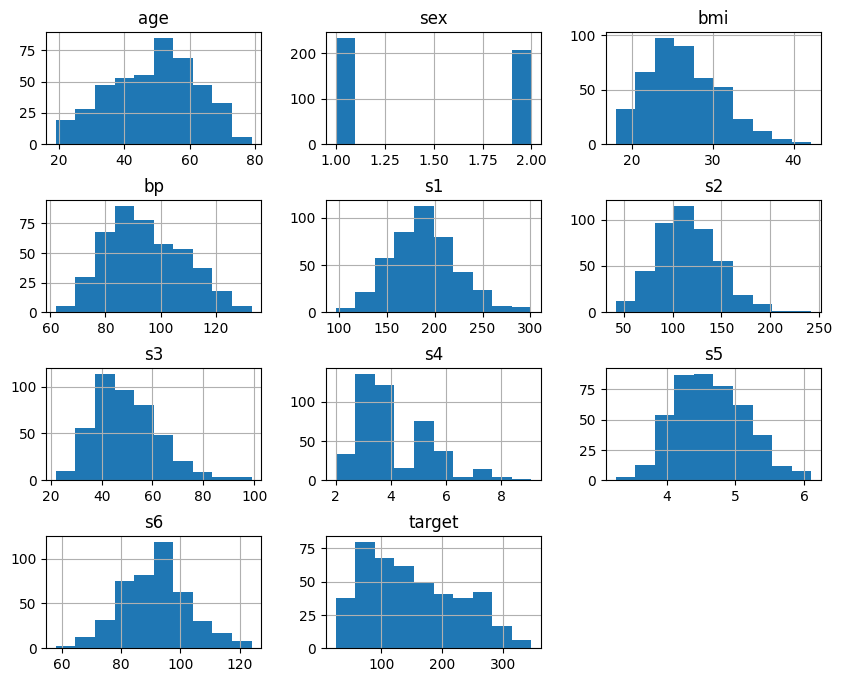

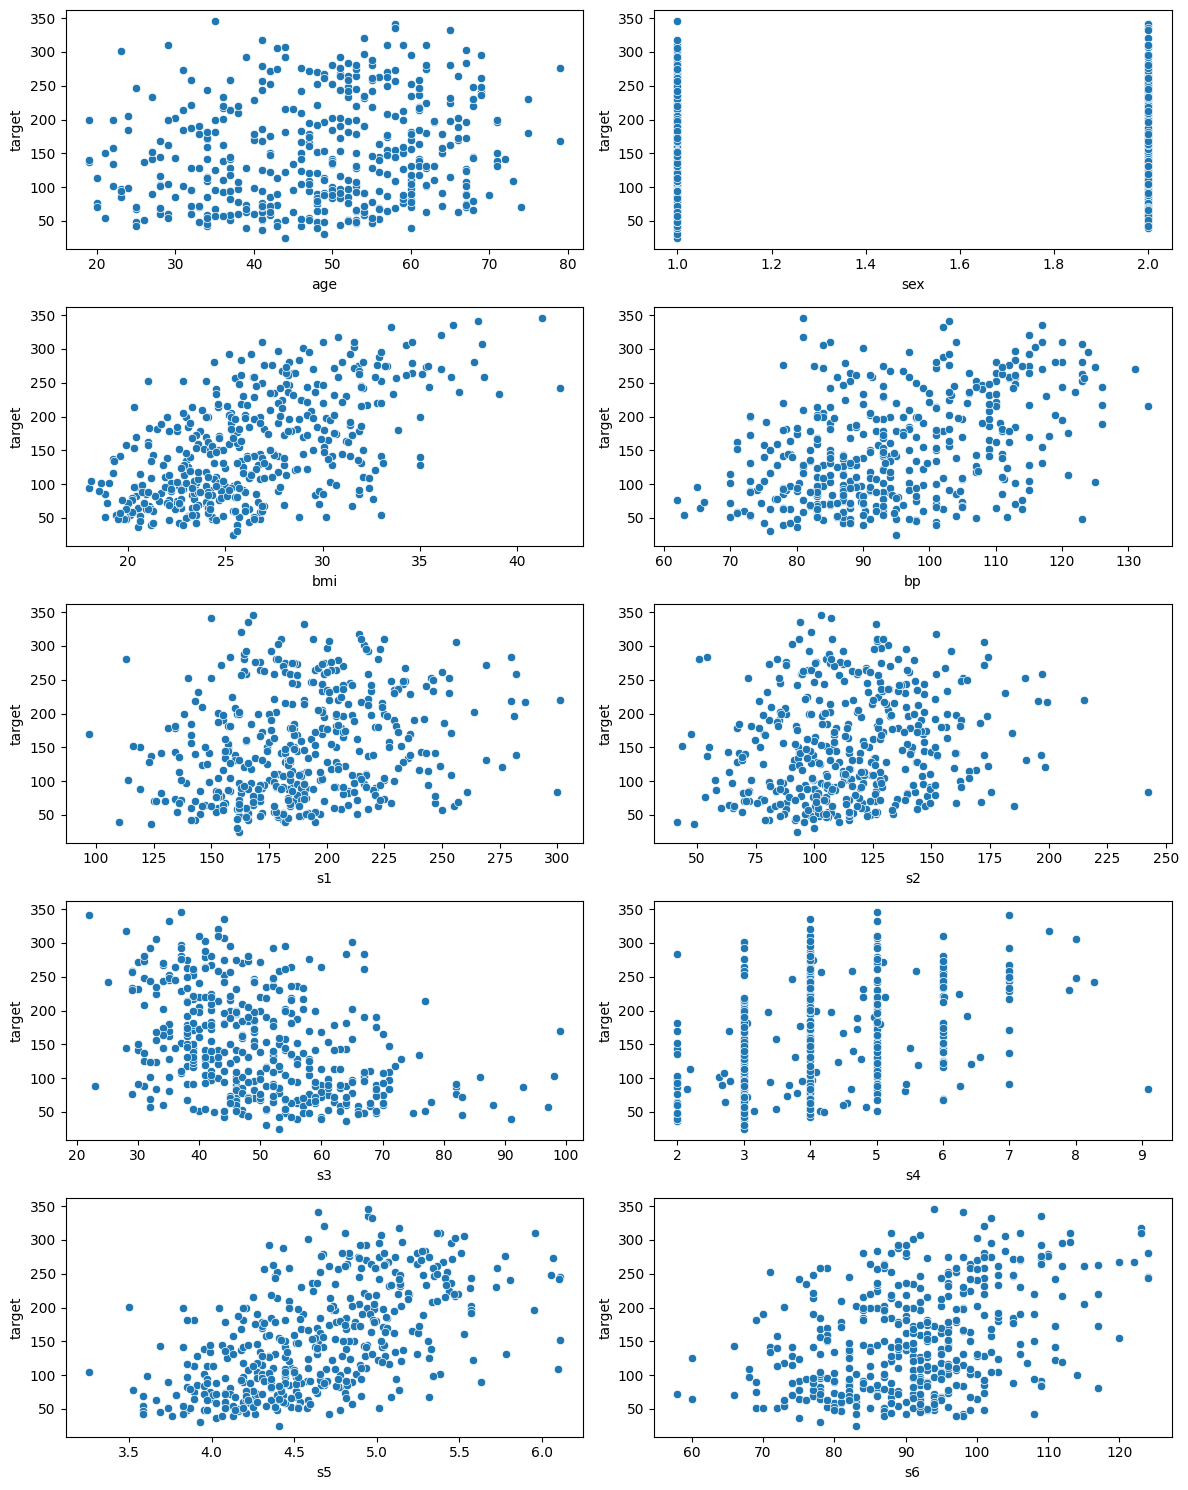

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

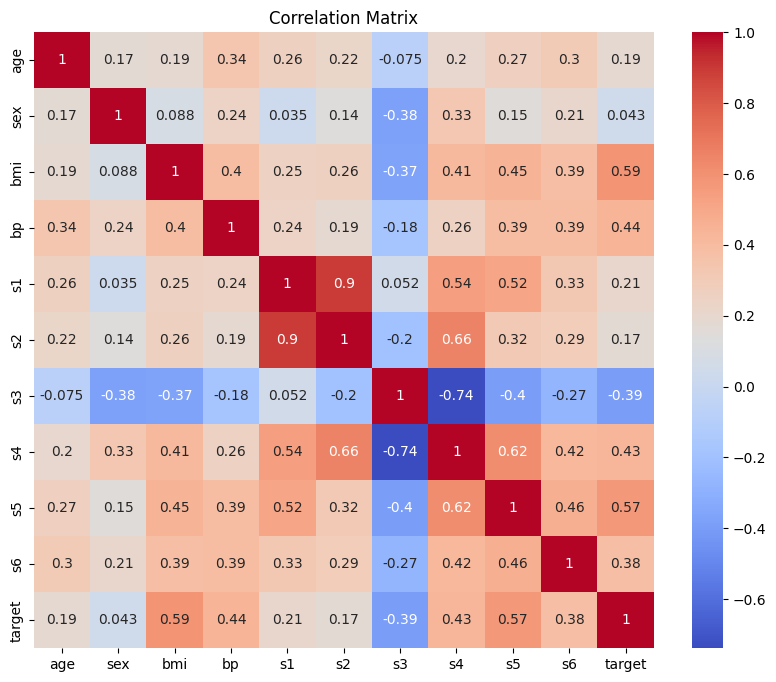

In [2]:
# check data type
#print(data.dtypes)

# check null value
#print(data.isnull().sum())

data['target'] = diabetes_y

# describe
print(data.describe())
print(data.head(10))
# histogram
data.hist(figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)
plt.show()

# 
# column
columns_to_plot = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# 5*2
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  

# loop
index = 0
for i in range(5):
    for j in range(2):
        if index < len(columns_to_plot):
            sns.scatterplot(data=data, x=columns_to_plot[index], y='target', ax=axes[i, j])
            index += 1
plt.tight_layout()  
plt.show()

#correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



## Insights
Strong correlations between features like BMI, BP, S1, S2, S4, and S5 with the target variable, these features should be given higher priority during feature selection. S3 shows a negative correlation with the target variable. This suggests that higher values of S3 might be associated with lower blood glucose levels

## 4. Clean the data if needed, and explain your reasoning for your reader 
Based on the initial analysis, the numerical data seems clean and doesn't require significant cleaning. There are no obvious missing values, inconsistencies, or outliers. However, the 'sex' column might need further examination to ensure that the values 1 and 2 represent male and female accurately.



## 5. Split the dataset to a train (75%) and validation set (10%), and test set (15%).


In [5]:
from sklearn.model_selection import train_test_split

# split x_temp,x_test, test should be 15% of dataset
X_temp, X_test, y_temp, y_test = train_test_split(
    diabetes_X, 
    diabetes_y,
    test_size=0.15,    # 15% 
    random_state=42    
)

# then split temp data into train(75%/85% ≈ 88.2%)and validate(10%/85% ≈ 11.8%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.118,   # 10% / 85% ≈ 0.118
    random_state=42
)

# 
print(f"train: {len(X_train)} ({len(X_train)/len(diabetes_X):.1%})")
print(f"validation: {len(X_val)} ({len(X_val)/len(diabetes_X):.1%})")
print(f"test: {len(X_test)} ({len(X_test)/len(diabetes_X):.1%})")

train: 330 (74.7%)
validation: 45 (10.2%)
test: 67 (15.2%)


## 6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models) (1.5 point)

Summary of Model Performance Metrics:
 Degree  Train R²  Val R²  Train MAE  Val MAE  Train MAPE  Val MAPE
      0    0.0000 -0.0000    66.5482  63.4475     63.3521   58.7933
      1    0.3542  0.4493    52.2781  41.9976     48.4624   40.4450
      2    0.3548  0.4492    52.2673  41.7577     48.4479   40.3099
      3    0.3550  0.4473    52.2234  41.7410     48.3564   40.2590
      4    0.3580  0.4491    51.9444  41.9528     47.9635   40.2406
      5    0.3589  0.4535    51.8138  42.0834     47.8315   40.3405


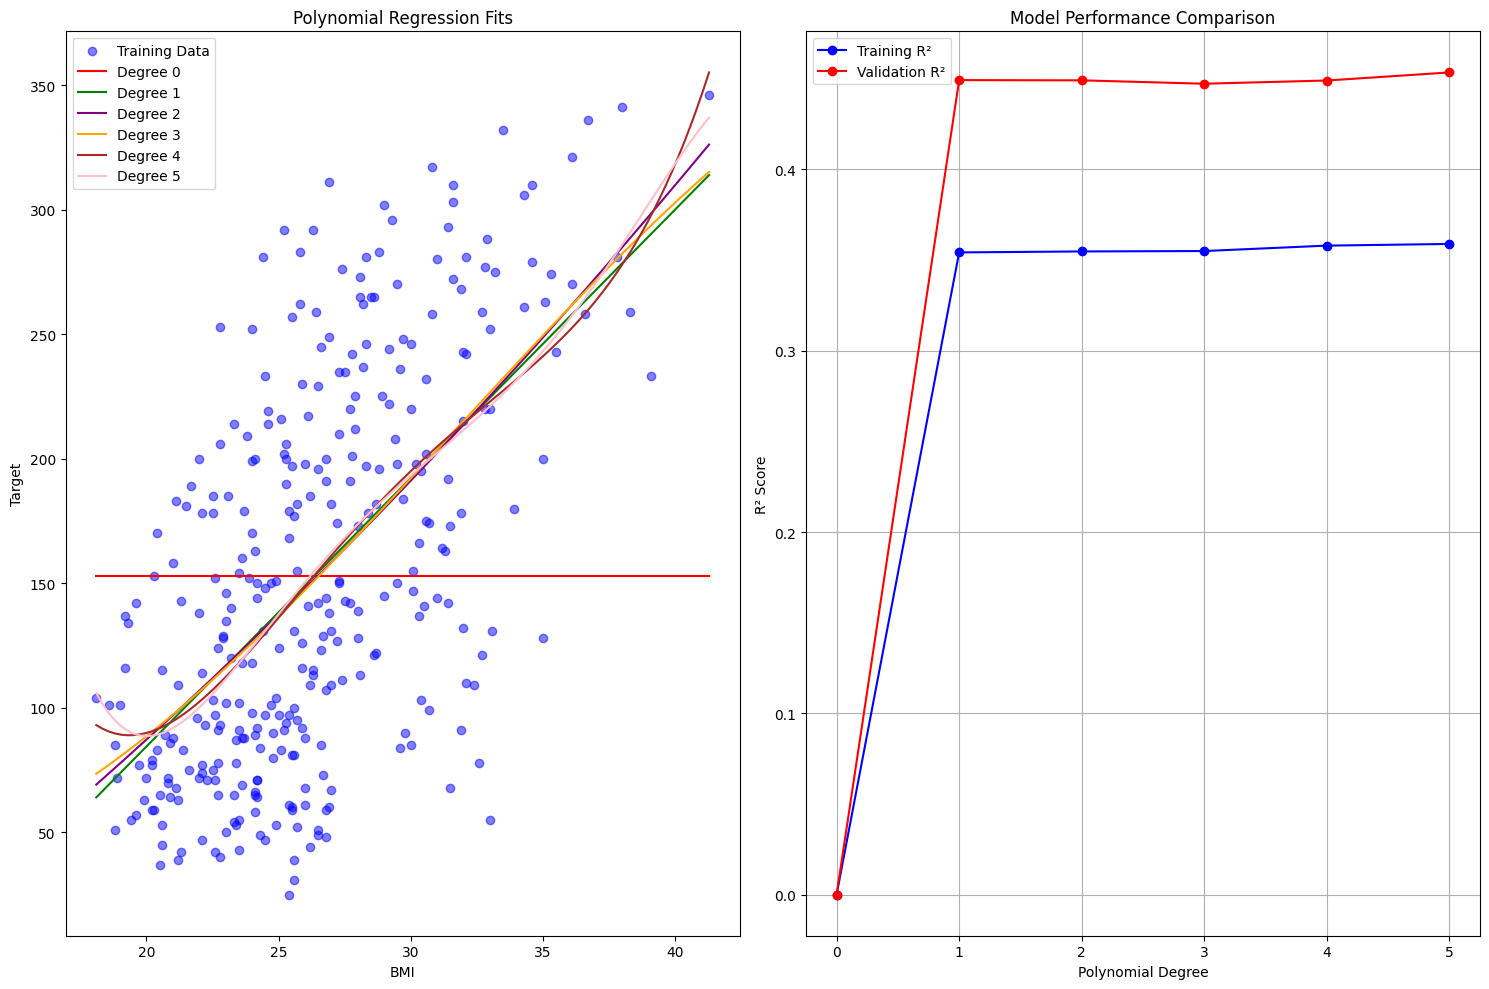

In [10]:
from sklearn.preprocessing import PolynomialFeatures


import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Extract BMI feature
#print(X_train[['bmi']].values)
X_train_bmi = X_train[['bmi']].values
X_val_bmi = X_val[['bmi']].values

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Dictionary to store models and metrics
models = {}
metrics_data = {
    'Degree': [],
    'Train R²': [], 'Val R²': [],
    'Train MAE': [], 'Val MAE': [],
    'Train MAPE': [], 'Val MAPE': []
}

# Train different polynomial regression models
for degree in range(6):  # 0 to 5 degrees
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_bmi)
    X_val_poly = poly_features.transform(X_val_bmi)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models[degree] = model
    
    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics
    metrics_data['Degree'].append(degree)
    
    # R-squared
    metrics_data['Train R²'].append(r2_score(y_train, y_train_pred))
    metrics_data['Val R²'].append(r2_score(y_val, y_val_pred))
    
    # Mean Absolute Error
    metrics_data['Train MAE'].append(mean_absolute_error(y_train, y_train_pred))
    metrics_data['Val MAE'].append(mean_absolute_error(y_val, y_val_pred))
    
    # Mean Absolute Percentage Error
    metrics_data['Train MAPE'].append(mean_absolute_percentage_error(y_train, y_train_pred))
    metrics_data['Val MAPE'].append(mean_absolute_percentage_error(y_val, y_val_pred))

# Create summary table
summary_df = pd.DataFrame(metrics_data)
summary_df = summary_df.round(4)  # Round to 4 decimal places for readability

# Display summary table
print("Summary of Model Performance Metrics:")
print(summary_df.to_string(index=False))

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Data points and polynomial fits
plt.subplot(121)
plt.scatter(X_train_bmi, y_train, color='blue', alpha=0.5, label='Training Data')

X_plot = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)
colors = ['red', 'green', 'purple', 'orange', 'brown', 'pink']
for degree in range(6):
    poly_features = PolynomialFeatures(degree=degree)
    X_plot_poly = poly_features.fit_transform(X_plot)
    y_plot = models[degree].predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color=colors[degree], label=f'Degree {degree}')

plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Polynomial Regression Fits')
plt.legend()

# Plot 2: Metrics comparison
plt.subplot(122)
x = range(6)
plt.plot(x, metrics_data['Train R²'], 'bo-', label='Training R²')
plt.plot(x, metrics_data['Val R²'], 'ro-', label='Validation R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
    

Let's analyze the performance metrics to identify the best model:

1. R-squared (R²):
   - Higher R² indicates better fit
   - Training R² gradually increases from degree 0 to 5
   - Validation R² peaks at degree 2 (0.4492) and remains similar through degree 5 (0.4535)

2. Mean Absolute Error (MAE):
   - Lower MAE indicates better predictions
   - Both training and validation MAE improve significantly from degree 0 to 2
   - Minimal improvements after degree 2

3. Mean Absolute Percentage Error (MAPE):
   - Lower MAPE indicates better percentage accuracy
   - Similar pattern to MAE, with significant improvements up to degree 2
   - Minimal changes after degree 2

Best Model Identification:
Based on these metrics, the degree 2 polynomial appears to be the best model because:
1. It achieves a good balance between training and validation performance
2. Higher degree polynomials (3-5) don't significantly improve performance
3. It avoids overfitting while capturing the relationship between BMI and target
4. Validation metrics are strong:
   - R² = 0.4492
   - MAE = 41.7577
   - MAPE = 40.3099

The degree 2 model provides a good trade-off between model complexity and performance. Higher degree polynomials don't offer substantial improvements and might risk overfitting.